<a href="https://colab.research.google.com/github/mehakcodes123/my-project/blob/main/data_exploration_and_visualization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# -------------------------------
# 1. Import Required Libraries
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve visualization appearance
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)






In [ ]:
# -------------------------------
# 2. Load Dataset
# -------------------------------

# Load Netflix dataset (Make sure file is in same folder)
df = pd.read_csv("/content/netflix_titles.csv")
# Preview dataset
print("First 5 rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDataset colunms:")
print(df.columns)



First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24

In [ ]:
# -------------------------------
# 3. Data Cleaning
# -------------------------------

# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing country values
df['country'] = df['country'].fillna('Unknown')

# Fill missing ratings
df['rating'] = df['rating'].fillna('Not Rated')

# Convert date_added column to datetime format (handle invalid values)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

print("\nData cleaning completed successfully.")


Data cleaning completed successfully.


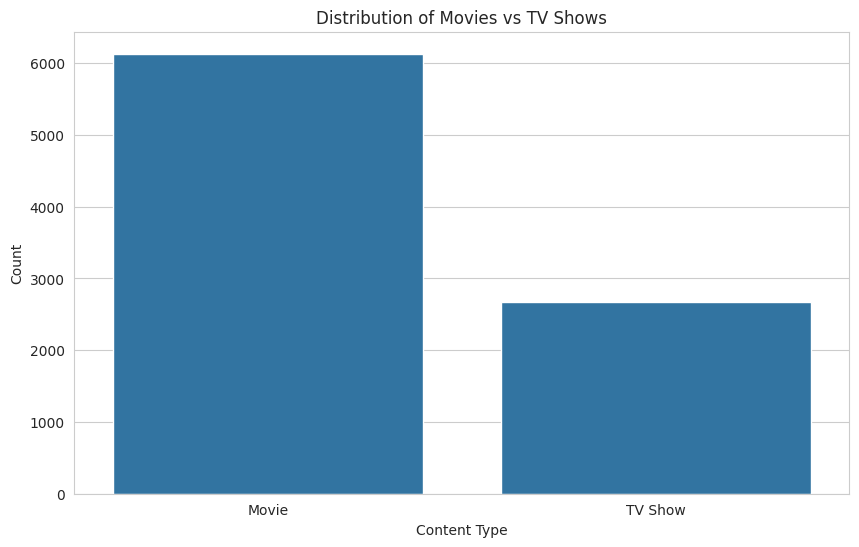

In [ ]:
 #-------------------------------
# 4. Movies vs TV Shows Analysis
# -------------------------------

plt.figure()
sns.countplot(data=df, x='type')

plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


## Analyst Insight:
### Netflix contains more Movies than TV Shows,
### indicating strong investment in film content.

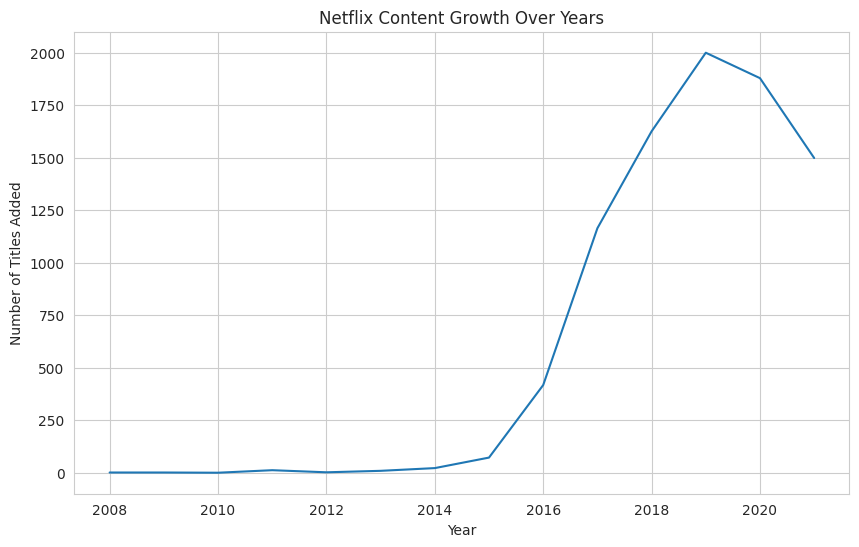

In [ ]:
# -------------------------------
# 5. Content Growth Over Years
# -------------------------------

year_data = df['year_added'].value_counts().sort_index()

plt.figure()
plt.plot(year_data.index, year_data.values)

plt.title("Netflix Content Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

## Analyst Insight:
### Significant content growth observed after 2016,
### reflecting aggressive global expansion strategy.

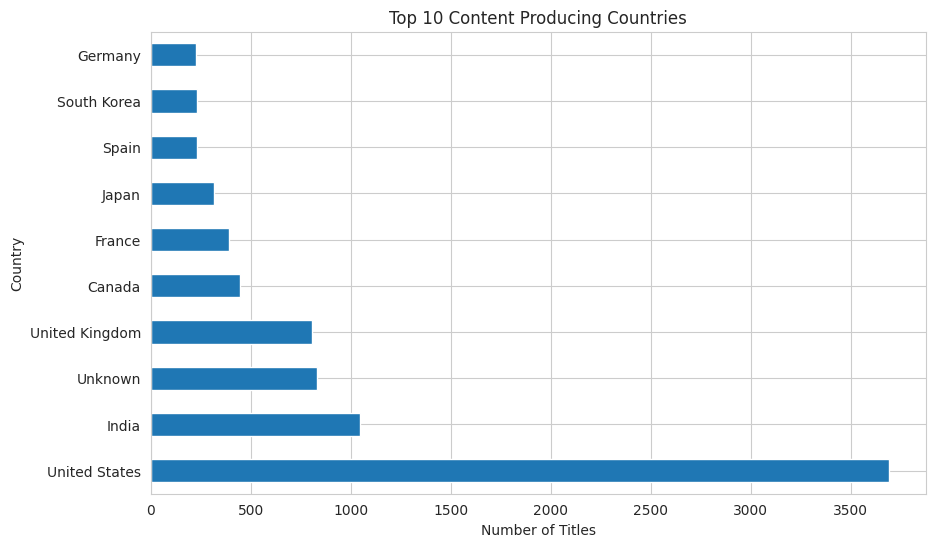

In [ ]:
# -------------------------------
# 6. Top 10 Producing Countries
# -------------------------------

# Split multiple countries into separate rows
country_df = df['country'].str.split(', ').explode()

top_countries = country_df.value_counts().head(10)

plt.figure()
top_countries.plot(kind='barh')

plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


## Analyst Insight:
### USA leads production followed by India and UK,
### showing dominance of major entertainment industries.

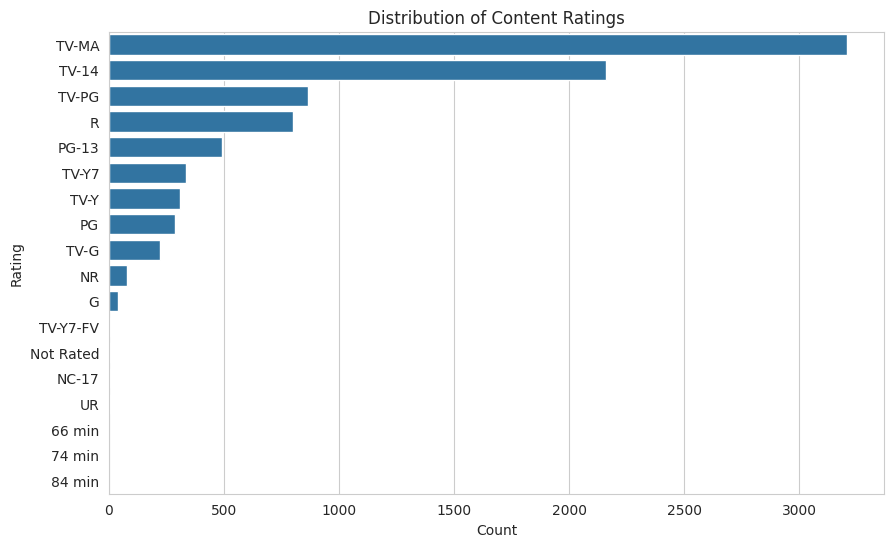

In [ ]:
 #-------------------------------
# 7. Rating Distribution
# -------------------------------

plt.figure()
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)

plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


## Analyst Insight:
### TV-MA and TV-14 are the most common ratings,
### indicating strong focus on mature and teen audiences.

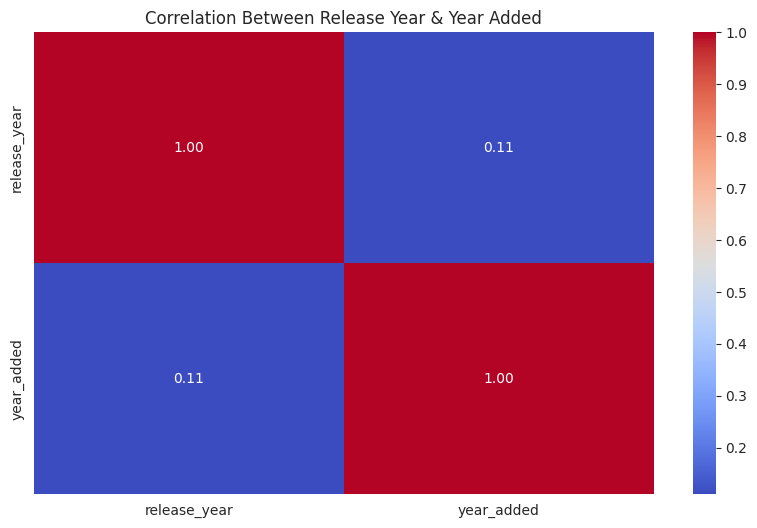

In [ ]:
# -------------------------------
# 8. Correlation Heatmap
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure columns exist
for col in ['release_year', 'year_added']:
    if col not in df.columns:
        df[col] = pd.NaT  # Or df[col] = 0 if appropriate

# Convert to numeric safely
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')

# Drop rows with missing values in these two columns
corr_df = df[['release_year', 'year_added']].dropna()

# Compute correlation
corr = corr_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Release Year & Year Added")
plt.show()

## Analyst Insight:
### Strong positive correlation suggests Netflix
### prioritizes adding recently released content.

In [ ]:
# -------------------------------
# 9. Final Summary
# -------------------------------

print("\nEDA Completed Successfully!")
print("Key Findings:")
print("1. Movies dominate over TV Shows.")
print("2. Rapid growth after 2016.")
print("3. USA and India are top content producers.")
print("4. Majority content targets mature audience.")


EDA Completed Successfully!
Key Findings:
1. Movies dominate over TV Shows.
2. Rapid growth after 2016.
3. USA and India are top content producers.
4. Majority content targets mature audience.
